## Problem 2: Equivlent circuit model

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [61]:
## Cell Parameters
r = 0.06                #radius in mm
c_m = 10                #specific membrane capacitance in nF/mm^2
g_m = 1                 #miuS/mm^2
A = 4 * math.pi * r * r #area of cell
C_m = A * c_m           #Capacitance in nF
G_m = A * g_m
R = 1 / G_m             #Resistance in MegaOhm
V_rest = -70             #Leakage current reversal potential in mV
tau = R * C_m  #C_m / G_m

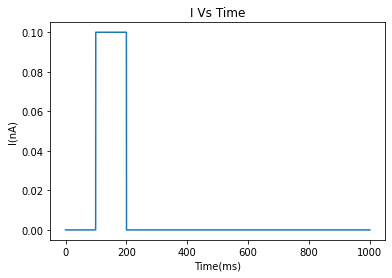

In [57]:
## Integration parameters
dt = 0.1          		#integration time-step in ms
Tdur = 1000       		#simulation total time in ms
V_0 = V_rest            #initial condition in mV
k = math.ceil(Tdur/dt)  #total number of iterations
V = np.zeros(k);  		#Voltage vector in mV
V[0] = V_0       		#assign to the first element of array V, the initial condition V0

##time vector
t = np.arange(0, Tdur, step=dt)

##Current pulse parameters    
Tstart = 100            #curent pulse start time in ms
Tstop = 200         	#curent pulse stop time in ms
Iamplitude = 0.1     	#current pulse amplitude in nA

I = np.zeros(k) 		#current vector in nA
I[(Tstart - 1) * 10: Tstop * 10]= Iamplitude #Assign amplitude when current is on 
plt.plot(t, I)
plt.title("I Vs Time")
plt.ylabel("I(nA)")
plt.xlabel("Time(ms)")
plt.show()

#### Integration with Exponential Euler loop

9.999999999999998


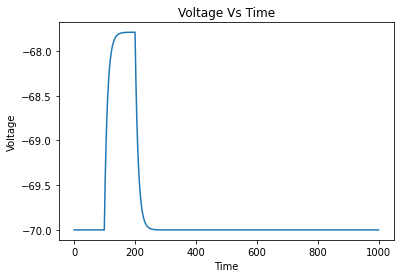

In [62]:
tau = R * C_m
## The change of tau
## if the tau is too small, square signal, change too fast
for i in range(k - 1):
    Vinf = V_rest + R * I[i]   #Update V infinity value at j iteration
    # 这里为什么要加上V_rest    
    #Compute V at iteration j+1 with Exponential Euler rule
    #print("time = {}, exponential = {}".format(i / 10, t[i] - t[i + 1] / (R * C)))   
    V[i + 1] = Vinf + (V[i] - Vinf) * math.exp((t[i] - t[i + 1]) / tau) 	
    
plt.figure(2)
plt.plot(t, V)
plt.title("Voltage Vs Time")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.show()	   